In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/IDR'

/content/drive/MyDrive/Colab Notebooks/IDR


In [ ]:
data = pd.read_pickle("data.pkl")
data


{'seqs': ['E Q E F S D N E L Q E L S T Q G S R Y V',
  'E V H E G A A T M D F M E Q E R E R G I',
  'P G G T R I I Y D R K F L M E C R N S P',
  'G T R I I Y D R K F L M E C R N S P V T',
  'L E A Q E E E E V G F P V T P Q V P L R',
  'S H L K S K K G Q S T S R H K K L M F K',
  'M S Y Q Q Q Q C K Q P C Q P P P V C P T',
  'E G E I N T E D D D D E D D D D D D D D',
  'K L N P P D E S G P G C M S C K C V L S',
  'H H E A E L K P L A Q S H A T K H K I P',
  'L S S G C E L P E S L Q A P S R E E A A',
  'V E G G A H D V I V K D R I N D Y H P K',
  'E H L L K A G A N I T P R E G D E L A R',
  'N F G P K G F G Y G Q G A G A L V H A Q',
  'K A H S R S S S G E T P A Q P E K T S G',
  'G L G S V F G R L A R I L G R V I P K V',
  'M K L A P Y I L E L L T S V N R T N G T',
  'R T S I P N A A S E E G D E D D W A S N',
  'S Y A E Q G K E Y I T D K A D K V A G K',
  'D M N S L M M G E D K I K F K H I T P L',
  'D R R I P G T A E E N L Q K S S G G V P',
  'E H S N D P F N V Y I E S D A W Q E K D',
  

In [ ]:
import pickle
import pandas as pd

# Step 1: Load the pickled data
with open('data.pkl', 'rb') as file:  # Replace 'data.pkl' with your file name
    unpickled_data = pickle.load(file)

# Step 2: Convert to DataFrame if necessary
if isinstance(unpickled_data, pd.DataFrame):
    df = unpickled_data  # Already a DataFrame
elif isinstance(unpickled_data, dict):
    df = pd.DataFrame.from_dict(unpickled_data)  # Convert dict to DataFrame
elif isinstance(unpickled_data, list):
    df = pd.DataFrame(unpickled_data)  # Convert list to DataFrame
else:
    raise ValueError("Unsupported data type for unpickled data.")



In [ ]:
df

,seqs,rog,cv,tau
0,E Q E F S D N E L Q E L S T Q G S R Y V,11.725914,0.444604,36585.162
1,E V H E G A A T M D F M E Q E R E R G I,11.912079,0.370302,40234.011
2,P G G T R I I Y D R K F L M E C R N S P,11.375047,0.399939,38123.675
3,G T R I I Y D R K F L M E C R N S P V T,11.457038,0.407542,34174.561
4,L E A Q E E E E V G F P V T P Q V P L R,11.509964,0.449730,34279.740
...,...,...,...,...
2301,V P I T V P T M P P I T S T T T I F T V T T T ...,36.485848,28.437099,1671983.913
2302,M N N P S E T S K P S M E S G D G N T G T Q T ...,37.987534,21.932923,1780917.318
2303,M E D L D Q S P L V S S S D S P P R P Q P A F ...,41.144171,24.990676,2427917.456
2304,M E D L D Q S P L V S S S D S P P R P Q P A F ...,35.640835,50.993446,987057.561


In [ ]:
df.isnull()

,seqs,rog,cv,tau
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2301,False,False,False,False
2302,False,False,False,False
2303,False,False,False,False
2304,False,False,False,False


In [ ]:
from transformers import T5Tokenizer, T5Model

# Load ProtT5 model and tokenizer
tokenizer = T5Tokenizer.from_pretrained("Rostlab/prot_t5_xl_uniref50")
model = T5Model.from_pretrained("Rostlab/prot_t5_xl_uniref50")
#model.eval()

In [ ]:
import torch

In [ ]:
sequences = df["seqs"].tolist()
print(sequences)

['E Q E F S D N E L Q E L S T Q G S R Y V', 'E V H E G A A T M D F M E Q E R E R G I', 'P G G T R I I Y D R K F L M E C R N S P', 'G T R I I Y D R K F L M E C R N S P V T', 'L E A Q E E E E V G F P V T P Q V P L R', 'S H L K S K K G Q S T S R H K K L M F K', 'M S Y Q Q Q Q C K Q P C Q P P P V C P T', 'E G E I N T E D D D D E D D D D D D D D', 'K L N P P D E S G P G C M S C K C V L S', 'H H E A E L K P L A Q S H A T K H K I P', 'L S S G C E L P E S L Q A P S R E E A A', 'V E G G A H D V I V K D R I N D Y H P K', 'E H L L K A G A N I T P R E G D E L A R', 'N F G P K G F G Y G Q G A G A L V H A Q', 'K A H S R S S S G E T P A Q P E K T S G', 'G L G S V F G R L A R I L G R V I P K V', 'M K L A P Y I L E L L T S V N R T N G T', 'R T S I P N A A S E E G D E D D W A S N', 'S Y A E Q G K E Y I T D K A D K V A G K', 'D M N S L M M G E D K I K F K H I T P L', 'D R R I P G T A E E N L Q K S S G G V P', 'E H S N D P F N V Y I E S D A W Q E K D', 'M D K V Q Y L T R S A I R R A S T I E M', 'A R S Y G

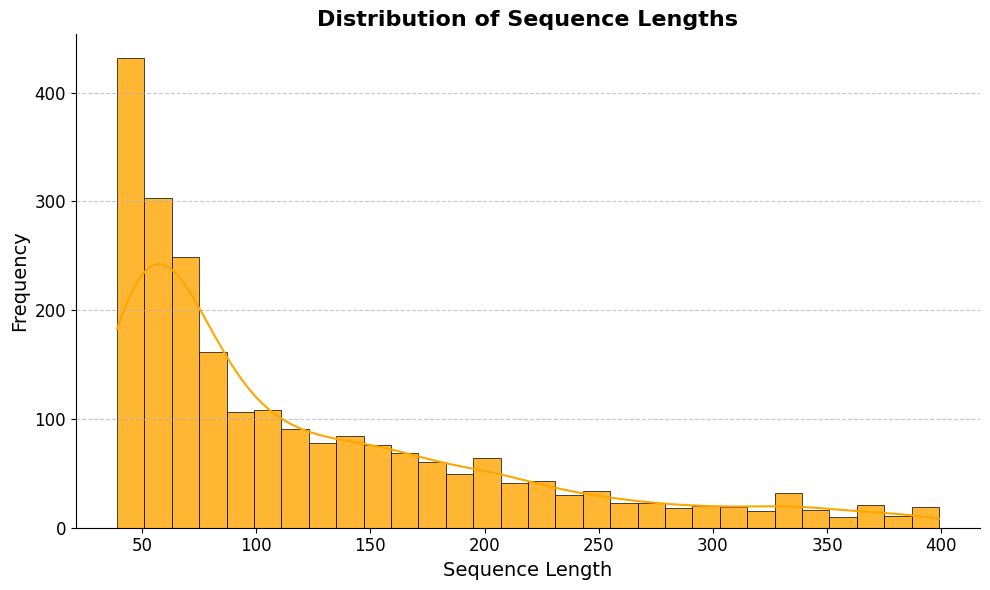

In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the pickled data
with open('data.pkl', 'rb') as file:  # Replace 'data.pkl' with your actual file
    unpickled_data = pickle.load(file)

# Convert unpickled data to a DataFrame
if isinstance(unpickled_data, pd.DataFrame):
    df = unpickled_data
elif isinstance(unpickled_data, dict):
    df = pd.DataFrame.from_dict(unpickled_data)
elif isinstance(unpickled_data, list):
    df = pd.DataFrame(unpickled_data)
else:
    raise ValueError("Unsupported data type for unpickled data.")

# Step 2: Extract sequences
if "seqs" in df.columns:
    sequences = df["seqs"].tolist()

    # Calculate sequence lengths
    sequence_lengths = [len(seq) for seq in sequences]

    # Create a seaborn-style plot for sequence length distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(sequence_lengths, bins=30, kde=True, color='orange', alpha=0.8, edgecolor='black', linewidth=0.5)
    plt.title("Distribution of Sequence Lengths", fontsize=16, weight='bold')
    plt.xlabel("Sequence Length", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine()
    plt.tight_layout()
    plt.show()
else:
    print("The DataFrame does not contain a 'seqs' column.")


In [ ]:
import torch
import pickle  # For saving the embeddings tensor

# Function to tokenize, pad, and generate embeddings
def generate_embeddings_with_padding(sequences, model, tokenizer, batch_size=16):
    embeddings = []
    total_batches = len(sequences) // batch_size + (1 if len(sequences) % batch_size != 0 else 0)
    print(f"Total batches to process: {total_batches}")

    for i in range(0, len(sequences), batch_size):
        # Batch sequences
        batch = sequences[i:i + batch_size]
        print(f"Processing batch {i // batch_size + 1}/{total_batches} with {len(batch)} sequences.")

        # Tokenize and pad
        tokenized = tokenizer(
            batch,
            padding="longest",
            truncation=True,
            return_tensors="pt"
        )
        decoder_input_ids = tokenized["input_ids"].clone()

        # Generate embeddings
        with torch.no_grad():
            outputs = model(
                input_ids=tokenized["input_ids"],
                attention_mask=tokenized["attention_mask"],
                decoder_input_ids=decoder_input_ids
            )
            # Take the embeddings from the encoder's last hidden state
            embeddings.append(outputs.last_hidden_state.mean(dim=1))  # Pool embeddings (mean pooling)

        print(f"Batch {i // batch_size + 1} processed.")

    # Concatenate all embeddings
    print("Concatenating all embeddings.")
    return torch.cat(embeddings, dim=0)

# Generate embeddings for the sequences in the DataFrame
batch_size = 12
print("Starting the embeddings generation process...")
embeddings_tensor = generate_embeddings_with_padding(sequences, model, tokenizer, batch_size)
print("Embeddings generation completed.")

# Save the embeddings tensor to a file
output_file = "embeddings_tensor.pt"
print(f"Saving embeddings to {output_file}...")
torch.save(embeddings_tensor, output_file)

print(f"Embeddings successfully saved to {output_file}.")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Starting the embeddings generation process...
Total batches to process: 193
Processing batch 1/193 with 12 sequences.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Batch 1 processed.
Processing batch 2/193 with 12 sequences.
Batch 2 processed.
Processing batch 3/193 with 12 sequences.
Batch 3 processed.
Processing batch 4/193 with 12 sequences.
Batch 4 processed.
Processing batch 5/193 with 12 sequences.
Batch 5 processed.
Processing batch 6/193 with 12 sequences.
Batch 6 processed.
Processing batch 7/193 with 12 sequences.
Batch 7 processed.
Processing batch 8/193 with 12 sequences.
Batch 8 processed.
Processing batch 9/193 with 12 sequences.
Batch 9 processed.
Processing batch 10/193 with 12 sequences.
Batch 10 processed.
Processing batch 11/193 with 12 sequences.
Batch 11 processed.
Processing batch 12/193 with 12 sequences.
Batch 12 processed.
Processing batch 13/193 with 12 sequences.
Batch 13 processed.
Processing batch 14/193 with 12 sequences.
Batch 14 processed.
Processing batch 15/193 with 12 sequences.
Batch 15 processed.
Processing batch 16/193 with 12 sequences.
Batch 16 processed.
Processing batch 17/193 with 12 sequences.
Batch 17 

## **Current best model is saved best_model_3_1_2025.keras. and the code is in the next cell**

In [ ]:

df_embeddings.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,...,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000
mean,0.064043,0.088309,-0.211748,0.329029,-0.483178,0.019856,0.008750,-0.057290,-0.053485,0.059746,...,0.052823,0.076365,-0.204926,-0.091689,0.001693,0.061893,0.172106,-0.065525,-0.170880,-0.186137
std,0.036833,0.049040,0.260406,0.181933,0.268558,0.212404,0.202261,0.171189,0.156939,0.036027,...,0.170716,0.141385,0.136119,0.215981,0.050504,0.266085,0.282227,0.327150,0.145460,0.143634
min,0.001909,-0.162041,-1.102867,-0.478595,-1.367093,-0.700286,-1.205173,-0.698755,-0.658855,-0.109506,...,-0.604114,-0.531965,-0.676977,-0.927524,-0.233340,-1.371724,-1.016852,-1.228689,-0.781668,-0.880264
25%,0.036860,0.056153,-0.376516,0.214962,-0.658984,-0.115817,-0.115379,-0.170910,-0.154109,0.039000,...,-0.055067,-0.018856,-0.295763,-0.223356,-0.029872,-0.107501,-0.009521,-0.277851,-0.263181,-0.273216
50%,0.056013,0.084566,-0.207196,0.343712,-0.499947,0.026388,0.015646,-0.060548,-0.058888,0.059553,...,0.060356,0.078188,-0.204295,-0.091361,0.003747,0.057912,0.168015,-0.076546,-0.168227,-0.181236
75%,0.082294,0.115938,-0.040732,0.460621,-0.324457,0.159627,0.135432,0.050582,0.049032,0.080451,...,0.161680,0.167462,-0.116148,0.046116,0.035683,0.223657,0.345461,0.147569,-0.079701,-0.092036
max,0.240664,0.337560,0.651142,0.849303,0.878663,0.943955,0.756276,0.592658,0.507033,0.199858,...,0.684228,0.721911,0.320564,0.762983,0.185718,1.204791,1.759261,1.740756,0.334896,0.313921


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/IDR'

/content/drive/MyDrive/Colab Notebooks/IDR


Shape of embeddings DataFrame: (2306, 1024)
Shape of labels DataFrame: (2306, 3)


<ipython-input-13-a672c122acda>:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings_tensor = torch.load("embeddings_tensor.pt")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ main_input (InputLayer)   │ (None, 1, 1024)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 1, 64)          │        196,672 │ main_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 1, 64)          │        327,744 │ main_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, 1, 64)          │        458,816 │ main_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 1, 64)          │            256 │ conv1d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 1, 64)          │            256 │ conv1d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 1, 64)          │            256 │ conv1d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 1, 192)         │              0 │ batch_normalization_1… │
│ (Concatenate)             │                        │                │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 192)            │              0 │ concatenate_3[0][0]    │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         24,704 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 128)            │            512 │ dense_6[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 64)             │            256 │ dense_7[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 64)             │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ main_output (Dense)  

 Total params: 1,017,923 (3.88 MB)

 Trainable params: 1,017,155 (3.88 MB)

 Non-trainable params: 768 (3.00 KB)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


######### Evaluate: ##############
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.1167 - mae: 0.0855
Test loss: 0.11119402945041656
Test MAE: 0.08005531132221222


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
Evaluation Metrics on Test Data:
Mean Absolute Error (MAE): 12759.907237168954
Mean Squared Error (MSE): 1703029573.8472624
R-squared (R2): 0.9694162565255274


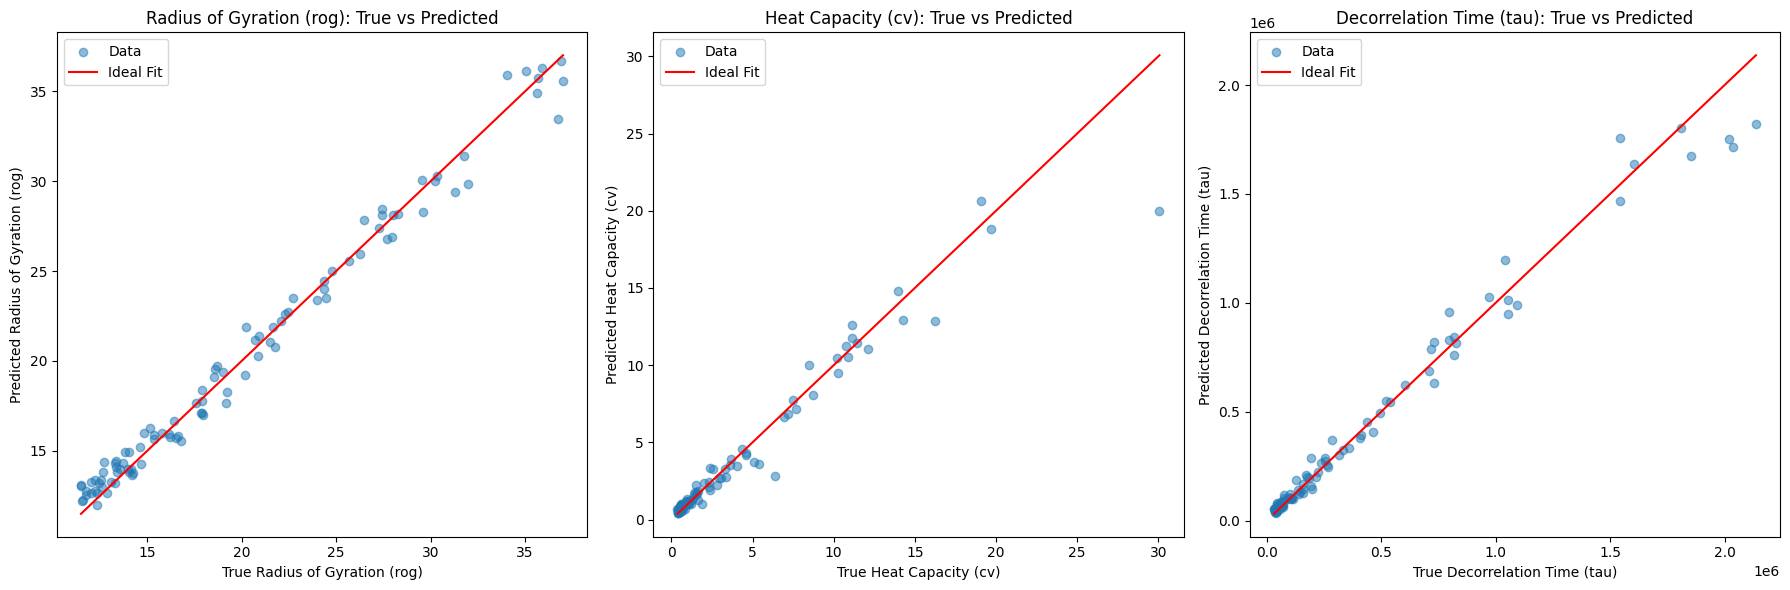

In [ ]:
import pickle
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dropout, Dense, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.regularizers import l2

# Step 1: Load the pickled data
with open('data.pkl', 'rb') as file:  # Replace 'data.pkl' with your file name
    unpickled_data = pickle.load(file)

# Convert unpickled data to a DataFrame
if isinstance(unpickled_data, pd.DataFrame):
    df_labels = unpickled_data  # Already a DataFrame
elif isinstance(unpickled_data, dict):
    df_labels = pd.DataFrame.from_dict(unpickled_data)  # Convert dict to DataFrame
elif isinstance(unpickled_data, list):
    df_labels = pd.DataFrame(unpickled_data)  # Convert list to DataFrame
else:
    raise ValueError("Unsupported data type for unpickled data.")

# Ensure df_labels has the correct columns (e.g., 'rog', 'cv', 'tau')
if not all(col in df_labels.columns for col in ['rog', 'cv', 'tau']):
    raise ValueError("The DataFrame does not contain the required columns: 'rog', 'cv', 'tau'.")

# Step 2: Load the embeddings tensor
embeddings_tensor = torch.load("embeddings_tensor.pt")

# Convert embeddings tensor to a DataFrame
if isinstance(embeddings_tensor, torch.Tensor):
    df_embeddings = pd.DataFrame(embeddings_tensor.numpy())
else:
    raise ValueError("Unsupported data type for embeddings tensor.")

# Step 3: Ensure the DataFrames are correctly shaped
if df_labels.shape[0] != df_embeddings.shape[0]:
    raise ValueError("The number of rows in df_labels and df_embeddings do not match.")

# Step 4: Reduce df_labels to only the required columns ('rog', 'cv', 'tau')
df_labels = df_labels[['rog', 'cv', 'tau']]

# Verify shapes
print("Shape of embeddings DataFrame:", df_embeddings.shape)  # Should be (2306, 1024)
print("Shape of labels DataFrame:", df_labels.shape)  # Should be (2306, 3)

# Step 5: Normalize the embeddings and labels
embedding_scaler = StandardScaler()
scaled_embeddings = embedding_scaler.fit_transform(df_embeddings.values)
df_embeddings = pd.DataFrame(scaled_embeddings, columns=df_embeddings.columns)

label_scaler = StandardScaler()
scaled_labels = label_scaler.fit_transform(df_labels.values)
df_labels_scaled = pd.DataFrame(scaled_labels, columns=df_labels.columns)

# Prepare input data
input_data = df_embeddings.values.reshape((df_embeddings.shape[0], 1, df_embeddings.shape[1]))  # Shape: (2306, 1, 1024)

# Shuffle data for training and validation
indices = np.arange(input_data.shape[0])
np.random.shuffle(indices)
input_data = input_data[indices]
labels = scaled_labels[indices]

# Split dataset
train_input = input_data[:2306]
train_labels = labels[:2306]
val_input = input_data[2100:]
val_labels = labels[2100:]
test_input = input_data[1100:1200]
test_labels = labels[1100:1200]

# Step 6: Define the model
main_input = Input(shape=(1, 1024), name='main_input')  # Adjusted input shape

# Add Bidirectional LSTM layers
blstm_1 = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.002)))(main_input)
blstm_1 = BatchNormalization()(blstm_1)
blstm_2 = Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.002)))(blstm_1)
blstm_2 = BatchNormalization()(blstm_2)

# Fully connected layer after pooling
fc = Dense(128, activation='relu', kernel_regularizer=l2(0.002))(blstm_2)
fc = BatchNormalization()(fc)
fc = Dropout(0.5)(fc)

# Additional dense layers
fc = Dense(64, activation='relu', kernel_regularizer=l2(0.002))(fc)
fc = BatchNormalization()(fc)
fc = Dropout(0.5)(fc)

# Output layer for regression
main_output = Dense(3, activation='linear', name='main_output')(fc)

# Compile the model
model = Model(inputs=main_input, outputs=main_output)
adam = Adam(learning_rate=1e-4, clipnorm=1.0)

model.compile(optimizer=adam, loss=MeanAbsoluteError(), metrics=['mae'])

# Model summary
model.summary()

# Callbacks
earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min')
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=1e-6, verbose=1)
load_file = "best_model_3_1_2025_p1.keras"
checkpointer = ModelCheckpoint(filepath=load_file, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

"""
# Training the model
history = model.fit(
    train_input, train_labels,
    validation_data=(val_input, val_labels),
    epochs=300,
    batch_size=32,
    callbacks=[checkpointer, earlyStopping, reduceLR],
    verbose=1
)
"""

# Load the best model and evaluate on test data
model.load_weights(load_file)
print("######### Evaluate: ##############")
score = model.evaluate(test_input, test_labels, verbose=1, batch_size=32)
print('Test loss:', score[0])
print('Test MAE:', score[1])

# Scale back predictions to original scale
predicted_labels = model.predict(test_input)
predicted_labels_rescaled = label_scaler.inverse_transform(predicted_labels)
true_labels_rescaled = label_scaler.inverse_transform(test_labels)

# Calculate evaluation metrics
mae = mean_absolute_error(true_labels_rescaled, predicted_labels_rescaled)
mse = mean_squared_error(true_labels_rescaled, predicted_labels_rescaled)
r2 = r2_score(true_labels_rescaled, predicted_labels_rescaled)

print("Evaluation Metrics on Test Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plotting predictions vs. true values for each label
labels_names = ['Radius of Gyration (rog)', 'Heat Capacity (cv)', 'Decorrelation Time (tau)']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes):
    ax.scatter(true_labels_rescaled[:, i], predicted_labels_rescaled[:, i], alpha=0.5, label='Data')
    ax.plot([min(true_labels_rescaled[:, i]), max(true_labels_rescaled[:, i])],
            [min(true_labels_rescaled[:, i]), max(true_labels_rescaled[:, i])], 'r-', label='Ideal Fit')
    ax.set_xlabel(f'True {labels_names[i]}')
    ax.set_ylabel(f'Predicted {labels_names[i]}')
    ax.legend()
    ax.set_title(f'{labels_names[i]}: True vs Predicted')

plt.tight_layout()
plt.show()


### Evaluation results

## New Test from here for above best 87

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


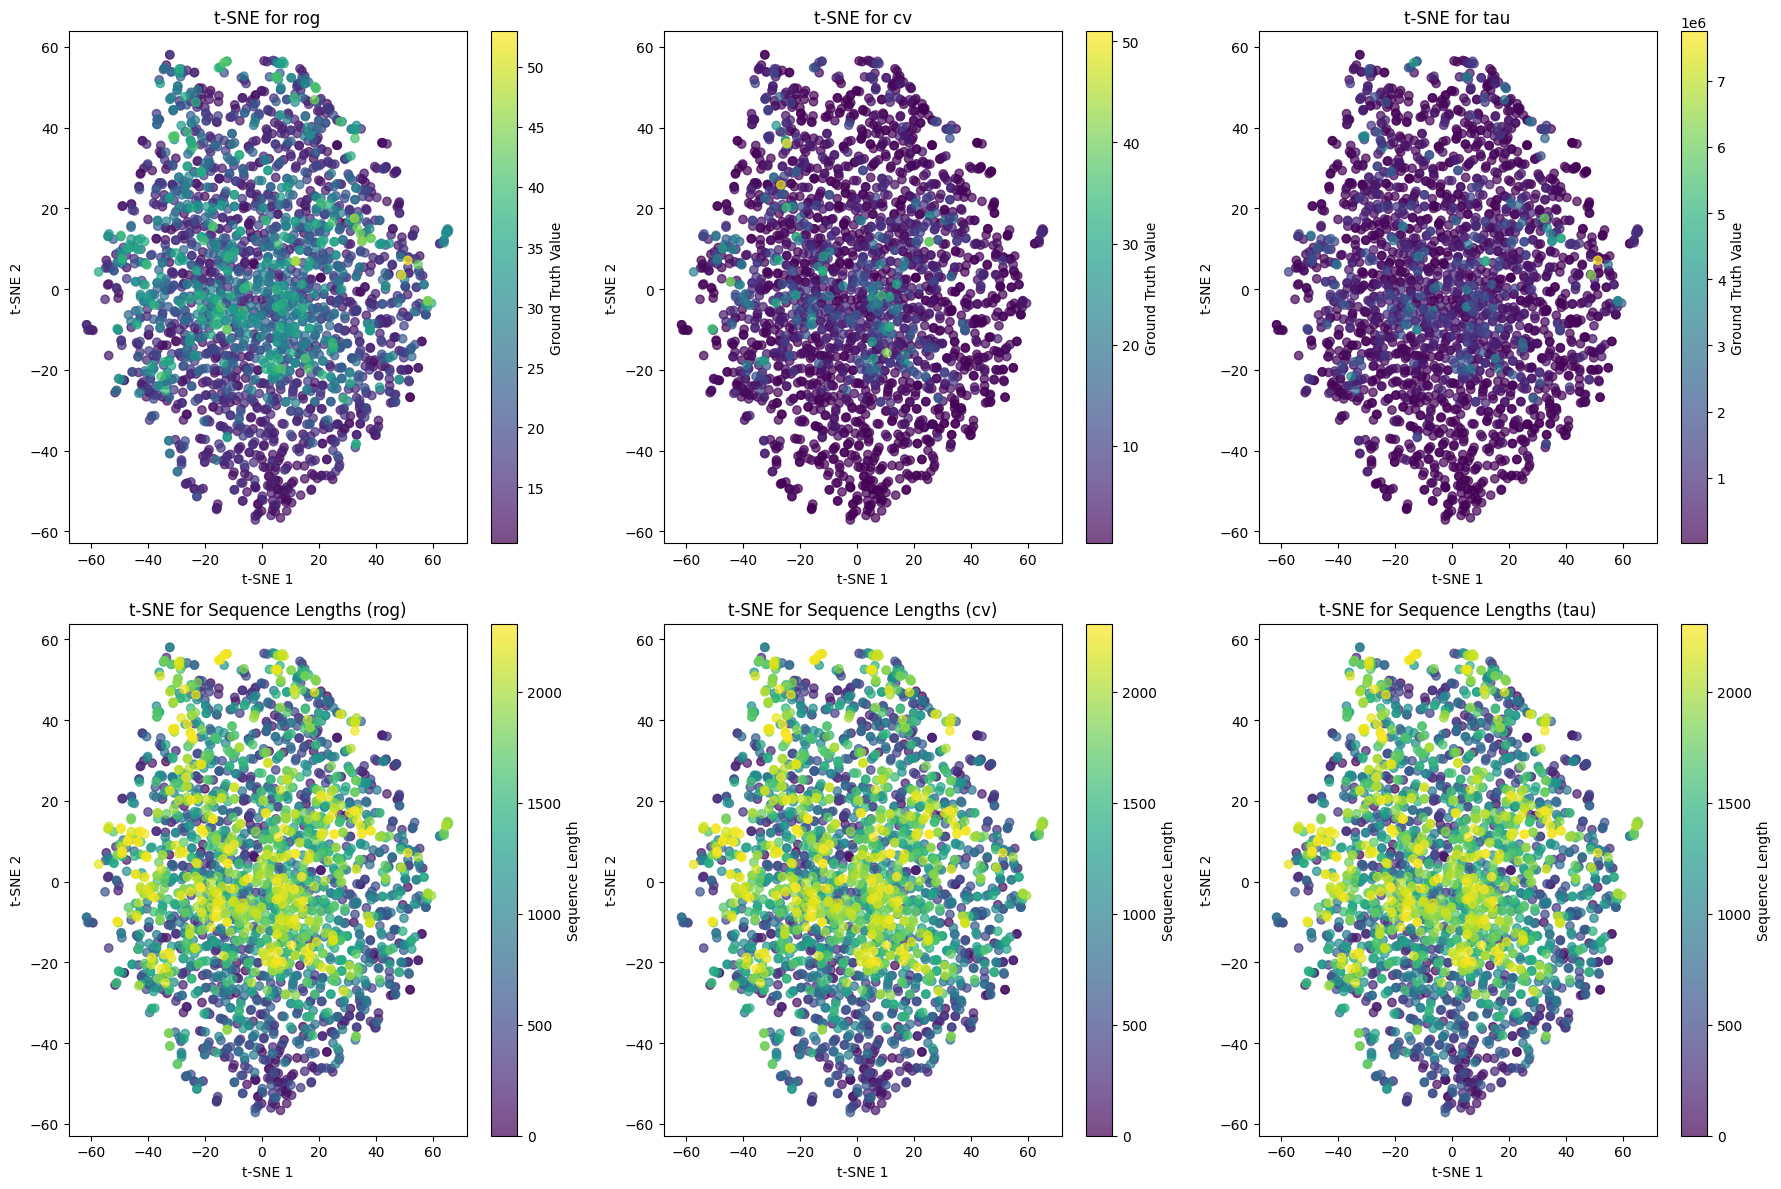

In [ ]:
from sklearn.manifold import TSNE

# Step 7: Generate t-SNE visualizations
# Use embeddings for t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(df_embeddings.values)

# Define ground truth and sequence length for plotting
ground_truths = ['rog', 'cv', 'tau']
sequence_lengths = df_labels.index  # Assuming sequence indices represent lengths or substitute actual length if available

# Plot t-SNE for ground truth values
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, ax in enumerate(axes[0]):
    scatter = ax.scatter(
        embeddings_2d[:, 0], embeddings_2d[:, 1],
        c=df_labels[ground_truths[i]], cmap='viridis', alpha=0.7
    )
    ax.set_title(f"t-SNE for {ground_truths[i]}")
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    plt.colorbar(scatter, ax=ax, label='Ground Truth Value')

# Plot t-SNE for sequence lengths
for i, ax in enumerate(axes[1]):
    scatter = ax.scatter(
        embeddings_2d[:, 0], embeddings_2d[:, 1],
        c=sequence_lengths, cmap='viridis', alpha=0.7
    )
    ax.set_title(f"t-SNE for Sequence Lengths ({ground_truths[i]})")
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    plt.colorbar(scatter, ax=ax, label='Sequence Length')

plt.tight_layout()
plt.show()


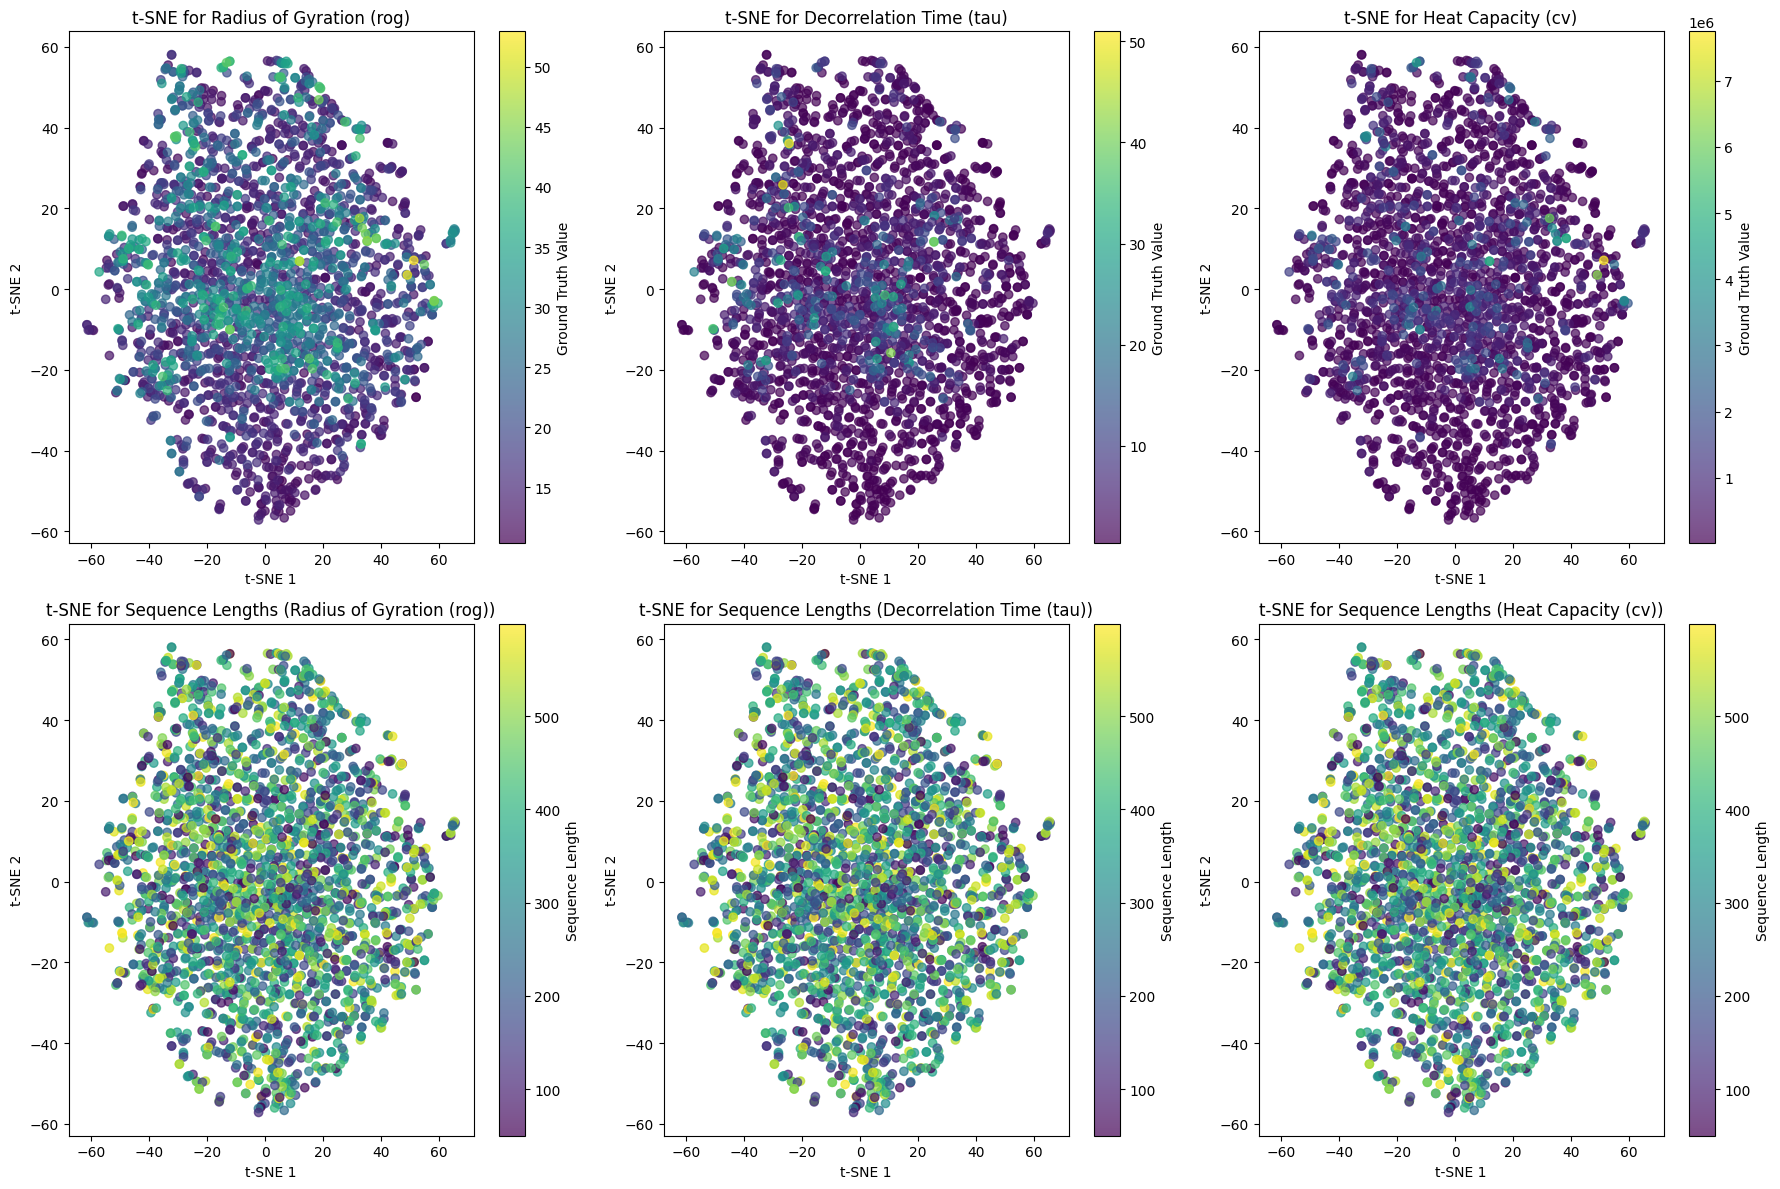

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Perform t-SNE on embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_embeddings.values)

# Create dummy sequence lengths for illustration if actual lengths are not available
sequence_lengths = np.random.randint(50, 600, size=df_labels.shape[0])

# Create t-SNE plots for ground truth values and sequence lengths
labels_names = ['Radius of Gyration (rog)', 'Decorrelation Time (tau)', 'Heat Capacity (cv)']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, ax in enumerate(axes[0]):
    scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_labels.iloc[:, i], cmap='viridis', alpha=0.7)
    ax.set_title(f't-SNE for {labels_names[i]}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    plt.colorbar(scatter, ax=ax, label='Ground Truth Value')

for i, ax in enumerate(axes[1]):
    scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=sequence_lengths, cmap='viridis', alpha=0.7)
    ax.set_title(f't-SNE for Sequence Lengths ({labels_names[i]})')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    plt.colorbar(scatter, ax=ax, label='Sequence Length')

plt.tight_layout()
plt.show()
